# Estudio Ánova

## Importaciones

Se debe de comprobar si se tienen instaladas, en caso de no tenerlas ejecutar lo siguiente:

In [5]:
!pip install pandas numpy scipy matplotlib
print('Instaladas')



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\mgonzgarc\Anaconda3\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats #Tabla Snedecor
import matplotlib.pyplot as plt


## Datos Iniciales

In [2]:
alpha = 0.05 #Nivel de significancia


## Tabla De Tratamientos

En caso de en el *csv* no estar separado mediante espacios, cambiar el argumento de `sep` por como estén. Ejemplos:
-  ' ': Separado por espacios.
- ';': Separado por punto y coma.
- ',': Separado por comas.

In [3]:
df_tratamientos = pd.read_csv('data/data.csv', sep=' ')
df_tratamientos


,Normal,Osteopenia,Osteoporósis
0,1200,1000,890
1,1000,1100,650
2,980,700,1100
3,900,800,900
4,750,500,400
5,800,700,350


### Cálculos de cantidades de interés

In [4]:
y_trat = []
for i in df_tratamientos.columns:
    y_trat.append(df_tratamientos[i].sum())
print(y_trat)


[5630, 4800, 4290]


In [5]:
ni = []
for i in df_tratamientos.columns:
    ni.append(df_tratamientos[i].count())

print(ni)


[6, 6, 6]


In [6]:
k = len(df_tratamientos.columns)
N = sum(ni)
print(f'Numero de tratamientos: {k}')
print(f'N total: {N}')


Numero de tratamientos: 3
N total: 18


## Tabla Ánova

In [7]:
df_anova = pd.DataFrame(index=['Tratamientos', 'Error', 'Total'], columns=['SC', 'GL', 'CM'])
df_anova


,SC,GL,CM
Tratamientos,NaN,NaN,NaN
Error,NaN,NaN,NaN
Total,NaN,NaN,NaN


In [8]:
sc_trat = 0
for i in range(k):
    sc_trat += (y_trat[i]**2)/ni[i]

sc_trat -= df_tratamientos.sum().sum()**2/N

df_anova['SC']['Tratamientos'] = sc_trat


In [9]:
sc_t = 0
sc_t = (df_tratamientos ** 2).sum().sum()
sc_t -= df_tratamientos.sum().sum()**2/N
df_anova['SC']['Total'] = sc_t


In [10]:
sc_error = sc_t - sc_trat
df_anova['SC']['Error'] = sc_error
df_anova


,SC,GL,CM
Tratamientos,152477.777778,NaN,NaN
Error,819833.333333,NaN,NaN
Total,972311.111111,NaN,NaN


In [11]:
df_anova['GL']['Tratamientos'] = k - 1
df_anova['GL']['Error'] = N-k
df_anova['GL']['Total'] = N-1
df_anova


,SC,GL,CM
Tratamientos,152477.777778,2,NaN
Error,819833.333333,15,NaN
Total,972311.111111,17,NaN


In [12]:
cm_trat = sc_trat/(k-1)
cm_error = sc_error/(N-k)
df_anova['CM']['Tratamientos'] = round(cm_trat, 4)
df_anova['CM']['Error'] = round(cm_error, 4)
df_anova


,SC,GL,CM
Tratamientos,152477.777778,2,76238.8889
Error,819833.333333,15,54655.5556
Total,972311.111111,17,NaN


## Estadístico

In [13]:
f_o = cm_trat/cm_error
print(f'Estadístico: {f_o}')


Estadístico: 1.3948973368571058


## Región de Rechazo

In [14]:
numerador = k-1
denominador = N-k

f_rechazo= stats.f.ppf(1 - alpha, numerador, denominador)

print("Región de rechazo de F:", f_rechazo)


Región de rechazo de F: 3.6823203436732412


## Conclusión

In [15]:
if f_rechazo > f_o:
    print("No se rechaza la hipótesis nula. Aceptamos H0. No hay diferencias entre los tratamientos.")
else:
    print("Se rechaza la hipótesis nula. Hay diferencias entre los tratamientos.")


No se rechaza la hipótesis nula. Aceptamos H0. No hay diferencias entre los tratamientos.


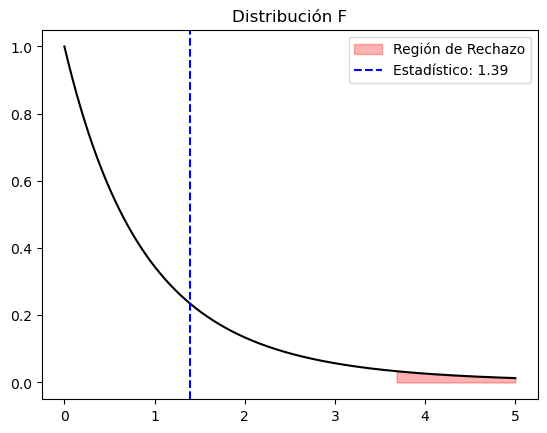

In [22]:
# GENERA LA FUNCIÓN DE SNEDECOR.
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, numerador, denominador)
plt.plot(x, y, color='black')

# REGIÓN DE RECHAZO
plt.fill_between(x, y, where=(x > f_rechazo), color='red', alpha=0.3, label='Región de Rechazo')

# ESTADÍSTICO
plt.axvline(f_o, color='blue', linestyle='--', label=f'Estadístico: {round(f_o, 2)}')

# MOSTRAR EL GRÁFICO
plt.title('Distribución F')
plt.legend()
plt.show()
